In [4]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns
iris = load_iris()

In [5]:
#pip install scikit-learn

In [6]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
#data.groupby("label").describe()

In [13]:
data['label'] = iris.target

In [14]:
set(iris.target), iris.target_names

({0, 1, 2}, array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [15]:
data.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
107,7.3,2.9,6.3,1.8,2
20,5.4,3.4,1.7,0.2,0
10,5.4,3.7,1.5,0.2,0
37,4.9,3.6,1.4,0.1,0
91,6.1,3.0,4.6,1.4,1


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [17]:
setosa = data[data['label']== 0]

In [18]:
setosa.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
39,5.1,3.4,1.5,0.2,0
42,4.4,3.2,1.3,0.2,0
18,5.7,3.8,1.7,0.3,0
0,5.1,3.5,1.4,0.2,0
38,4.4,3.0,1.3,0.2,0


<Axes: >

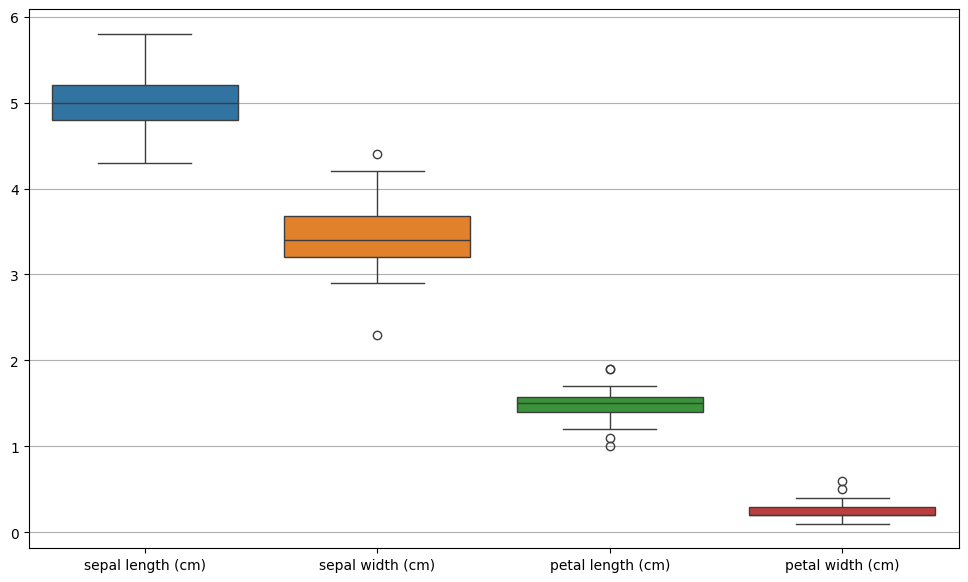

In [19]:
plot_setosa = setosa.drop('label', axis=1)
import matplotlib.pyplot as plt
plt.figure(figsize = (12,7))
plt.grid()
sns.boxplot(data = plot_setosa)

In [20]:
from matplotlib.cbook import boxplot_stats


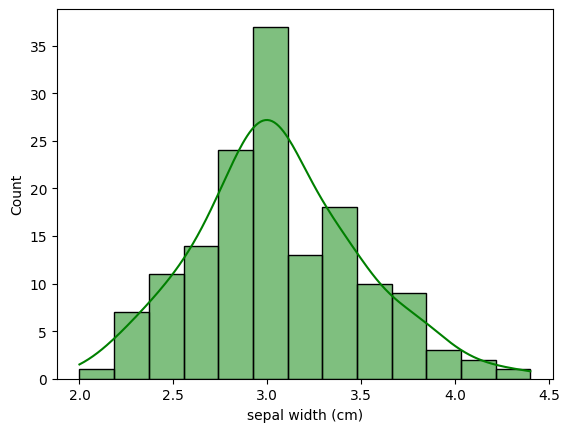

In [21]:
sns.histplot(data["sepal width (cm)"], kde= True, color= 'green');

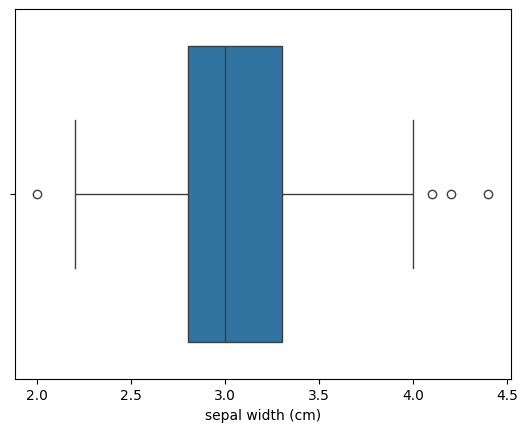

In [22]:
sns.boxplot(data=data, x='sepal width (cm)');


In [23]:
stats = boxplot_stats(data['sepal width (cm)'])


In [24]:
stats

[{'mean': 3.0573333333333337,
  'iqr': 0.5,
  'cilo': 2.9359050183971735,
  'cihi': 3.0640949816028265,
  'whishi': 4.0,
  'whislo': 2.2,
  'fliers': array([2. , 4.4, 4.1, 4.2]),
  'q1': 2.8,
  'med': 3.0,
  'q3': 3.3}]

In [25]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    IQR = Q3 - Q1
    print(Q1,Q3,IQR)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

In [26]:
outliers = detect_outliers_iqr(data['sepal width (cm)'])

2.8 3.3 0.5


In [27]:
data_wo_outliers = data[~data['sepal width (cm)'].isin(outliers)]

<Axes: >

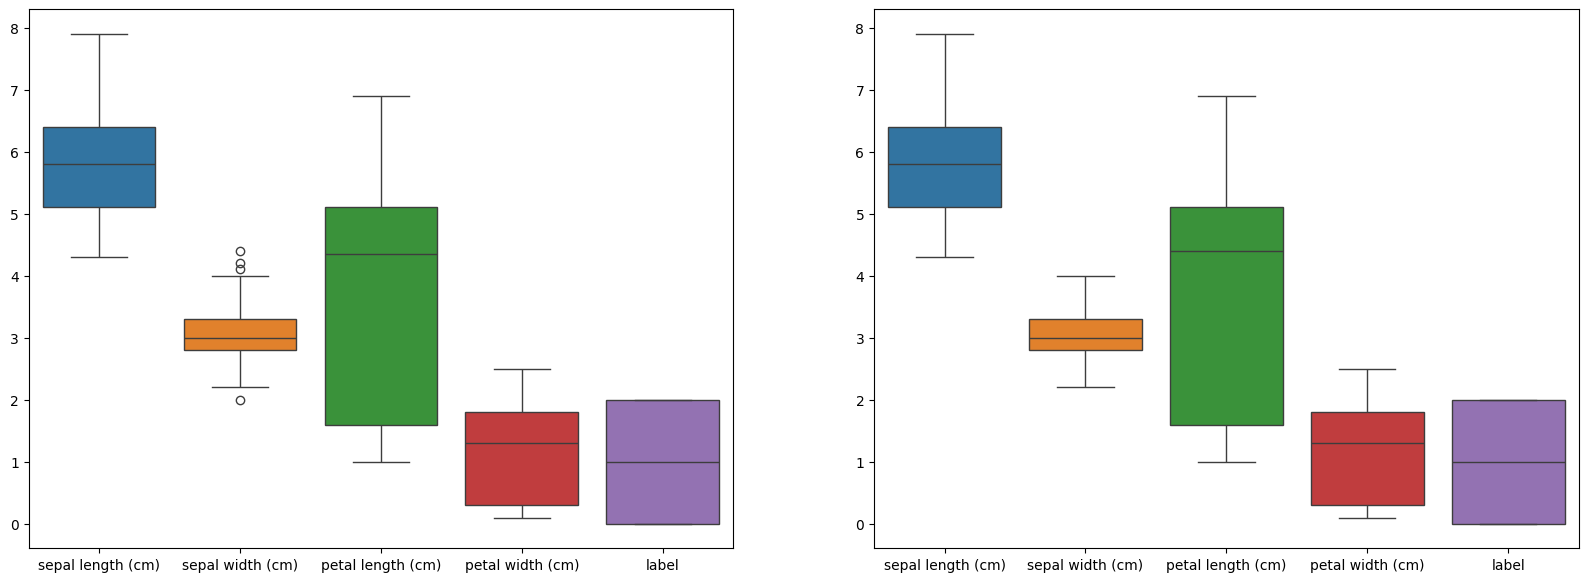

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(20, 7))
sns.boxplot(ax=axs[0], data=data)
sns.boxplot(ax=axs[1], data=data_wo_outliers)


All statistical methods custom functions

In [29]:
import numpy as np

def calculate_mean(dataframe):
    means = {}
    for column in dataframe.columns:
        column_values = dataframe[column].values
        means[column] = sum(column_values) / len(column_values)
    return means

def calculate_median(dataframe):
    medians = {}
    for column in dataframe.columns:
        column_values = dataframe[column].values
        sorted_values = sorted(column_values)
        length = len(sorted_values)
        if length % 2 == 0:
            median = (sorted_values[length // 2 - 1] + sorted_values[length // 2]) / 2
        else:
            median = sorted_values[length // 2]
        medians[column] = median
    return medians

def calculate_mode(dataframe):
    modes = {}
    for column in dataframe.columns:
        column_values = dataframe[column].values
        value_counts = dataframe[column].value_counts()
        max_count = value_counts.max()
        mode = value_counts[value_counts == max_count].index.tolist()
        modes[column] = mode
    return modes


def calculate_standard_deviation(dataframe):
    standard_deviations = {}
    for column in dataframe.columns:
        column_values = dataframe[column].values
        mean = sum(column_values) / len(column_values)
        squared_diff_sum = sum((x - mean) ** 2 for x in column_values)
        variance = squared_diff_sum / len(column_values)
        standard_deviations[column] = np.sqrt(variance)
    return standard_deviations

def calculate_variance(dataframe):
    variances = {}
    for column in dataframe.columns:
        column_values = dataframe[column].values
        mean = sum(column_values) / len(column_values)
        squared_diff_sum = sum((x - mean) ** 2 for x in column_values)
        variances[column] = squared_diff_sum / len(column_values)
    return variances


Mean

using python method

In [30]:
setosa.mean()

sepal length (cm)    5.006
sepal width (cm)     3.428
petal length (cm)    1.462
petal width (cm)     0.246
label                0.000
dtype: float64

Using custom functions

In [31]:
calculate_mean(setosa)

{'sepal length (cm)': 5.005999999999999,
 'sepal width (cm)': 3.428000000000001,
 'petal length (cm)': 1.4620000000000002,
 'petal width (cm)': 0.2459999999999999,
 'label': 0.0}

Median

using python methods

In [32]:
setosa.median()

sepal length (cm)    5.0
sepal width (cm)     3.4
petal length (cm)    1.5
petal width (cm)     0.2
label                0.0
dtype: float64

In [33]:
calculate_median(setosa)

{'sepal length (cm)': 5.0,
 'sepal width (cm)': 3.4,
 'petal length (cm)': 1.5,
 'petal width (cm)': 0.2,
 'label': 0.0}

Mode

Using python methods

In [34]:
setosa.drop('label', axis=1).mode()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.0,3.4,1.4,0.2
1,5.1,NaN,1.5,NaN


Using custom function

In [35]:
calculate_mode(setosa)

{'sepal length (cm)': [5.1, 5.0],
 'sepal width (cm)': [3.4],
 'petal length (cm)': [1.4, 1.5],
 'petal width (cm)': [0.2],
 'label': [0]}

In [36]:
#check
setosa['sepal length (cm)'].value_counts()

sepal length (cm)
5.1    8
5.0    8
5.4    5
4.8    5
4.9    4
4.6    4
4.4    3
5.2    3
4.7    2
5.7    2
5.5    2
4.3    1
5.8    1
4.5    1
5.3    1
Name: count, dtype: int64